<a href="https://colab.research.google.com/github/mmilannaik/bostonhousepricing/blob/main/W40S1_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-be17a401e8b3>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


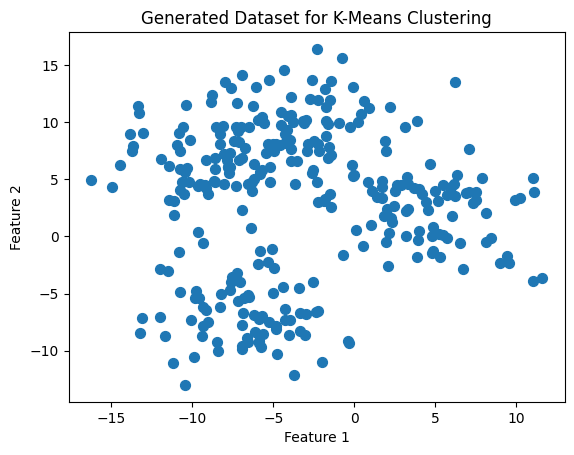

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Parameters
n_samples = 300
n_features = 2
centers = 4

# Generate data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=3, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [2]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_init = 10, n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

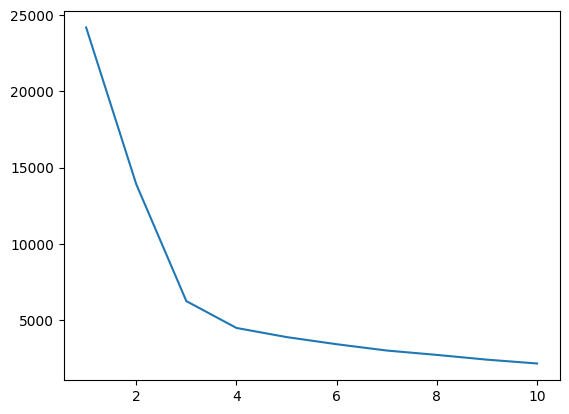

In [3]:
plt.plot(range(1,11),wcss)

In [4]:
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil.append(silhouette_avg)

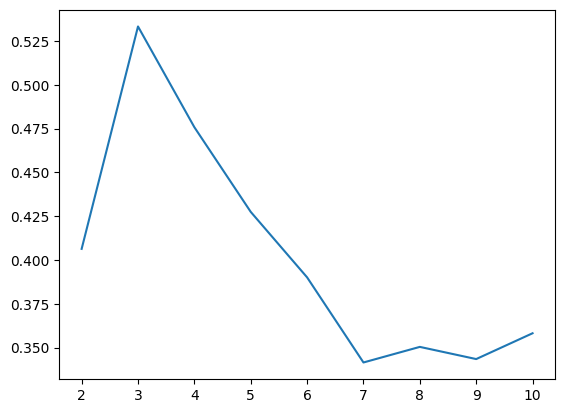

In [5]:
plt.plot(range(2,11),sil)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_init = 10, n_clusters = 4, verbose=100)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 7562.167889014707.
Iteration 1, inertia 5037.025806732751.
Iteration 2, inertia 4681.947898717367.
Iteration 3, inertia 4580.588586122792.
Iteration 4, inertia 4496.393335535831.
Iteration 5, inertia 4476.367348636015.
Iteration 6, inertia 4475.918395021896.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 8213.365423843767.
Iteration 1, inertia 4717.630271049913.
Iteration 2, inertia 4551.306742164386.
Iteration 3, inertia 4494.338247694391.
Iteration 4, inertia 4479.174755841133.
Iteration 5, inertia 4475.918395021896.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 9866.35788380073.
Iteration 1, inertia 5368.401827044196.
Iteration 2, inertia 4947.179439232536.
Iteration 3, inertia 4645.106982040279.
Iteration 4, inertia 4524.17764181785.
Iteration 5, inertia 4502.292265773572.
Iteration 6, inertia 4489.425558875599.
Iteration 7, inertia 4480.471438687805

KMeans(n_clusters=4, n_init=10, verbose=100)

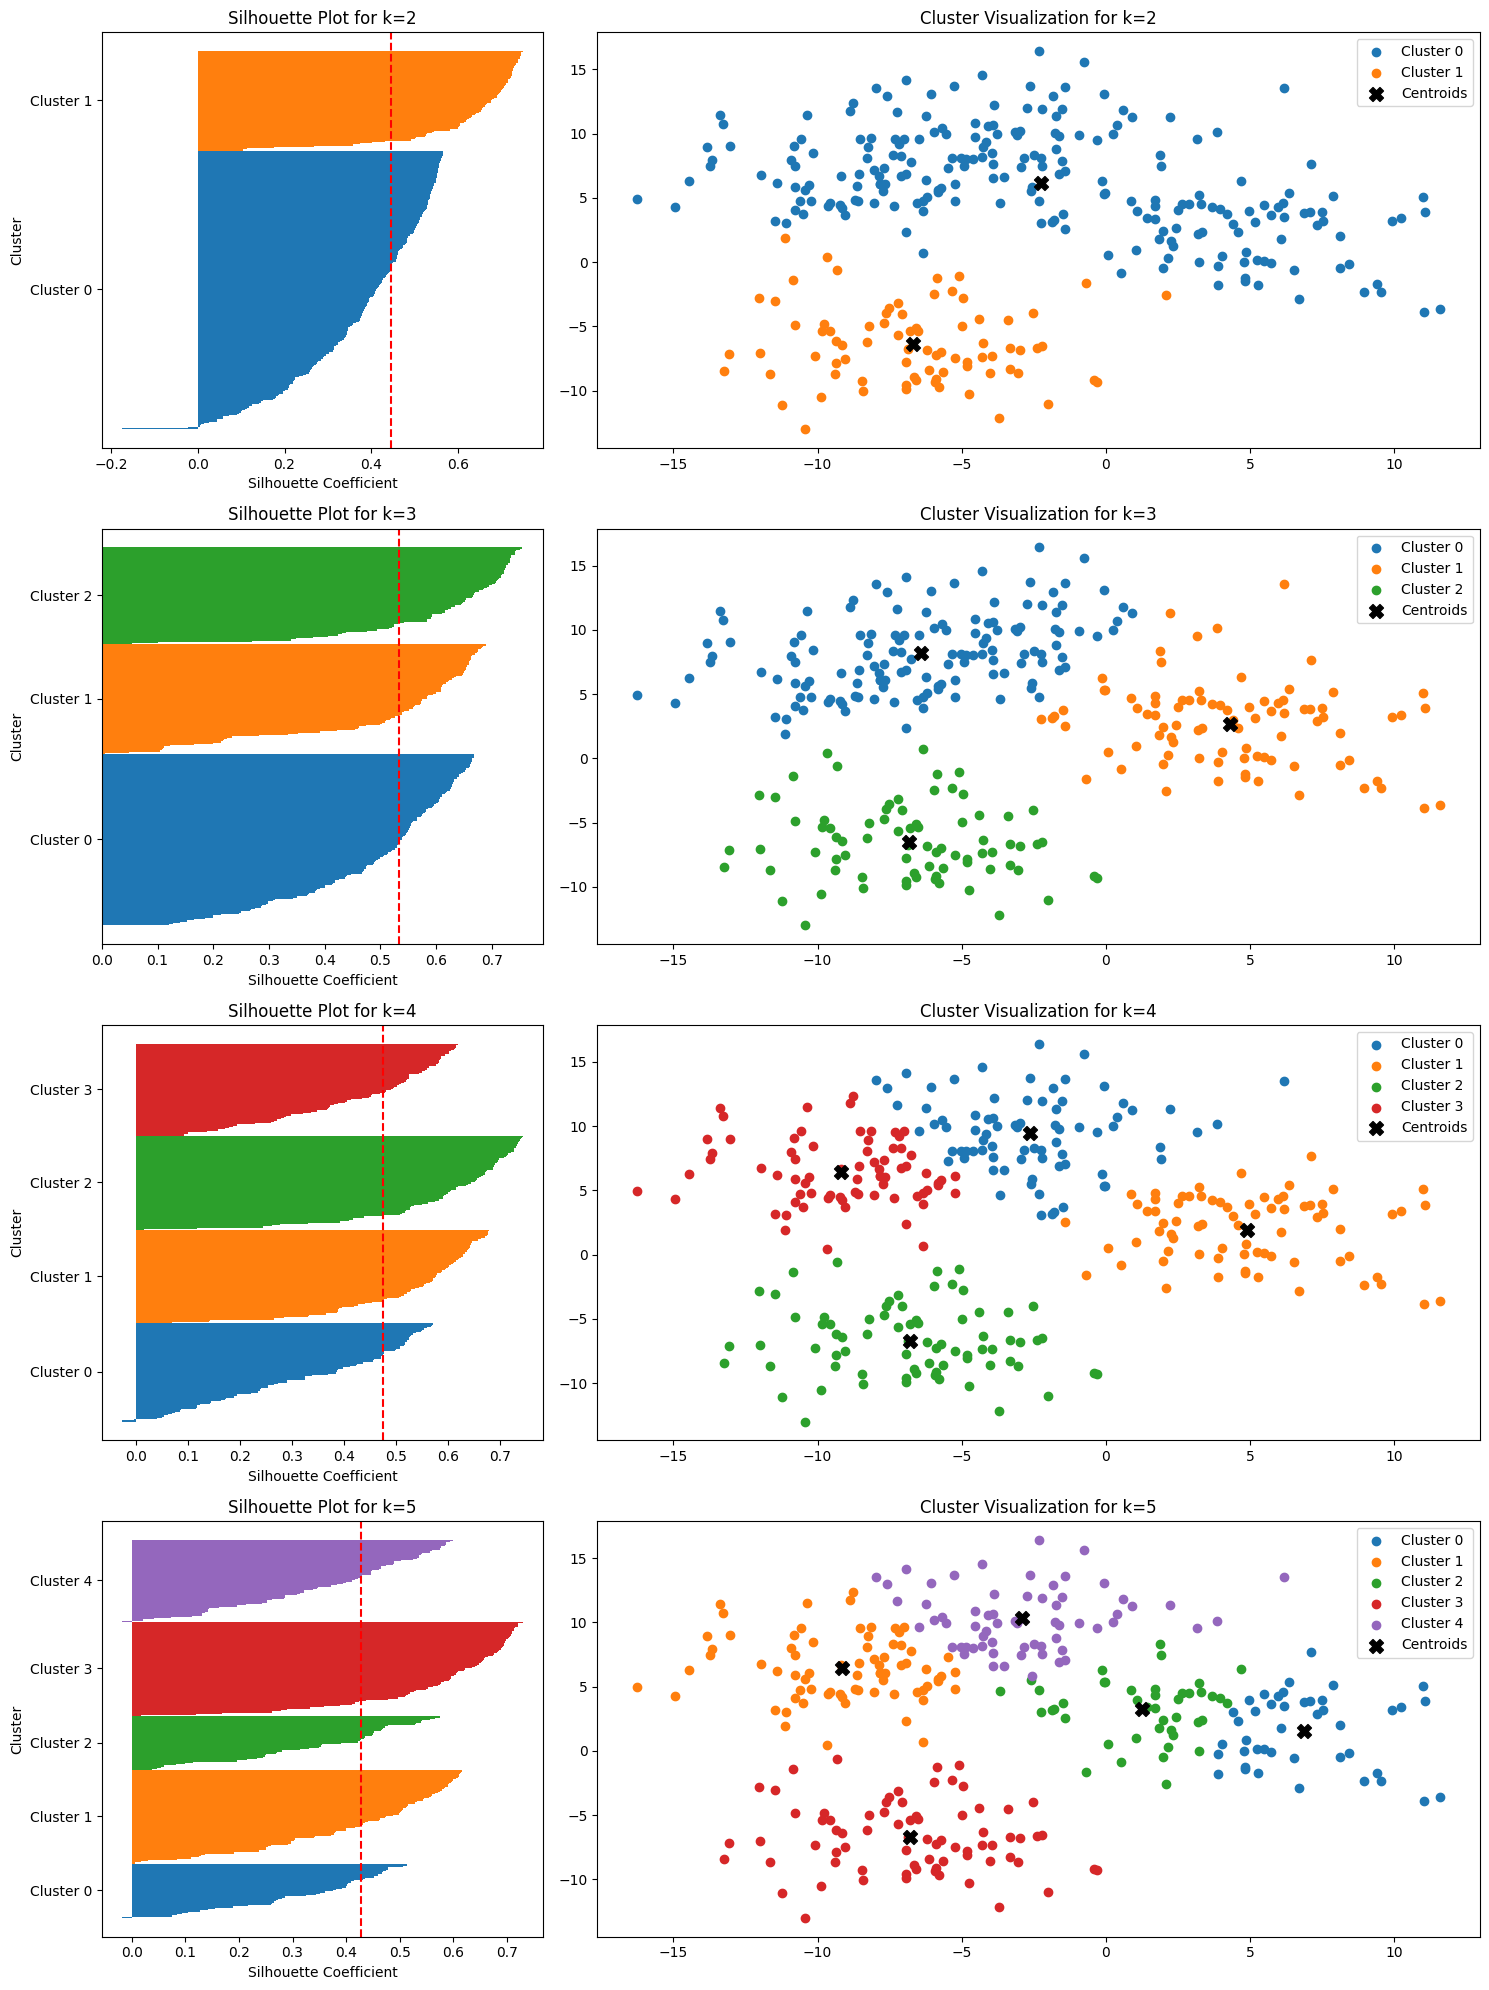

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np


# Setting up the subplot grid
fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 2])

# Creating silhouette and scatter plots for different values of k (2, 3, 4, 5)
for i, k in enumerate([2, 3, 4, 5]):
    # Clustering with k-means
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)

    # Silhouette values
    silhouette_vals = silhouette_samples(X, cluster_labels)
    avg_score = silhouette_score(X, cluster_labels)

    # Silhouette plot
    ax1 = plt.subplot(gs[i, 0])
    y_lower, y_upper = 0, 0
    yticks = []
    for j, cluster in enumerate(np.unique(cluster_labels)):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)
    ax1.axvline(avg_score, color="red", linestyle="--")
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([f'Cluster {x}' for x in np.unique(cluster_labels)])
    ax1.set_ylabel('Cluster')
    ax1.set_xlabel('Silhouette Coefficient')
    ax1.set_title(f'Silhouette Plot for k={k}')

    # Scatter plot
    ax2 = plt.subplot(gs[i, 1])
    for j in np.unique(cluster_labels):
        ax2.scatter(X[cluster_labels == j, 0], X[cluster_labels == j, 1], label=f'Cluster {j}')
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label='Centroids')
    ax2.set_title(f'Cluster Visualization for k={k}')
    ax2.legend()

plt.tight_layout()
plt.show()


In [8]:
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([1, 1, 2, 3, 1, 3, 0, 3, 4, 2, 4, 0, 2, 1, 1, 4, 1, 2, 4, 4, 0, 4,
       3, 1, 4, 4, 1, 3, 3, 2, 1, 2, 1, 0, 1, 4, 1, 3, 1, 3, 0, 4, 1, 3,
       2, 4, 1, 2, 1, 0, 3, 1, 3, 2, 3, 4, 1, 0, 0, 4, 1, 0, 0, 4, 3, 3,
       3, 3, 3, 4, 3, 3, 1, 0, 2, 1, 3, 3, 4, 3, 4, 4, 1, 4, 3, 1, 4, 0,
       0, 2, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 2, 0, 0, 2, 4, 2, 2, 4, 3, 1,
       0, 4, 4, 2, 4, 0, 1, 3, 1, 3, 3, 3, 2, 1, 3, 1, 1, 4, 1, 3, 0, 1,
       2, 1, 1, 0, 0, 1, 4, 3, 4, 0, 2, 4, 2, 2, 0, 0, 3, 4, 1, 4, 0, 3,
       4, 2, 3, 1, 1, 2, 1, 1, 3, 1, 0, 1, 3, 4, 4, 2, 4, 4, 3, 2, 2, 3,
       3, 4, 0, 3, 1, 4, 1, 0, 0, 1, 3, 2, 3, 2, 3, 3, 3, 1, 2, 3, 3, 0,
       2, 1, 4, 4, 3, 2, 4, 3, 3, 1, 3, 4, 4, 3, 3, 2, 1, 3, 4, 1, 1, 1,
       1, 3, 1, 3, 2, 2, 1, 4, 2, 0, 0, 4, 4, 3, 0, 3, 1, 0, 4, 1, 4, 3,
       3, 0, 4, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 4, 1, 4, 2, 4, 1, 1,
       3, 2, 3, 0, 0, 4, 4, 3, 2, 0, 1, 1, 3, 1, 4, 2, 2, 0, 0, 3, 1, 0,
       3, 0, 2, 3, 4, 3, 0, 4, 1, 4, 2, 1, 1, 4], d

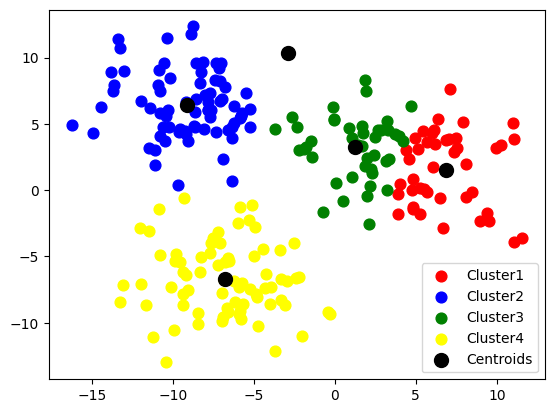

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

plt.show()

# Assignment

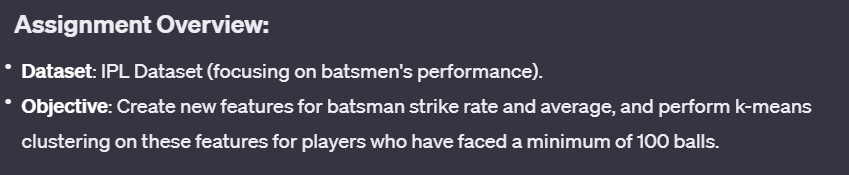

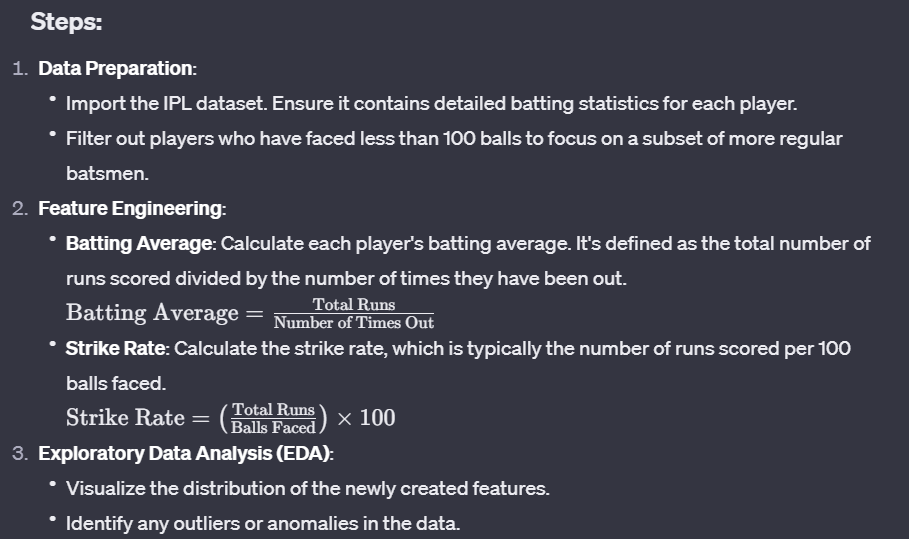

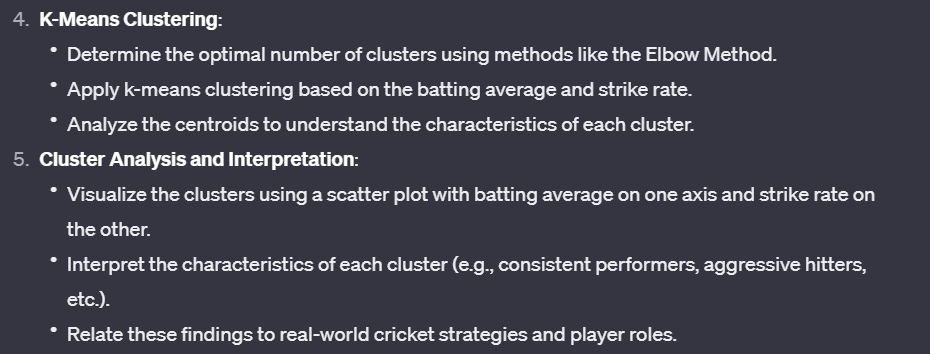

In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import time

# Generating synthetic data for clustering
n_samples = 100000
n_features = 10
n_clusters = 5
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)

# Function to measure time taken by KMeans using different algorithms
def measure_kmeans_time(algorithm):
    kmeans = KMeans(n_clusters=n_clusters, algorithm=algorithm, random_state=0)
    start_time = time.time()
    kmeans.fit(X)
    return time.time() - start_time

# Measuring time for Lloyd's algorithm
lloyd_time = measure_kmeans_time('lloyd')

# Measuring time for Elkan's algorithm
elkan_time = measure_kmeans_time('elkan')

lloyd_time, elkan_time



(0.07475066184997559, 0.10268497467041016)

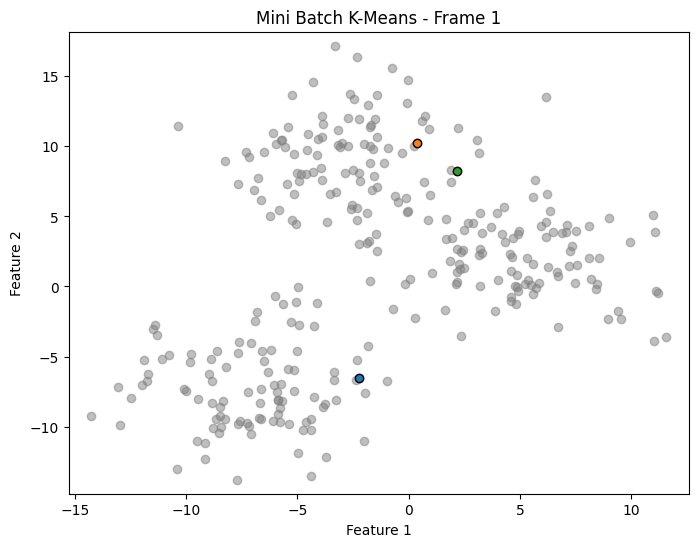

100/100

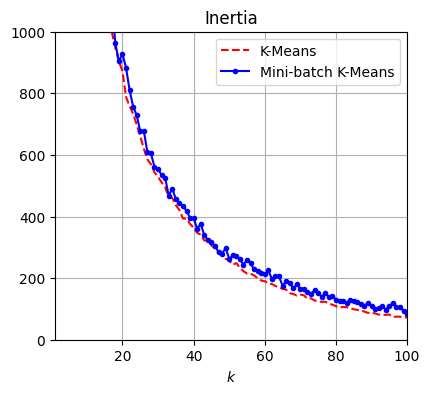